In [1]:
import numpy as np
import pandas as pd
import gensim
import os

**Step 1**: Download a few Python repositories, bellow are a few options.  Extra credit will be given if you download the repositories in an automated way using Python.

In [ ]:
from git.repo.base import Repo


repositories = {'matplotlib': 'git@github.com:matplotlib/matplotlib.git', 
                'scikit-learn': 'git@github.com:scikit-learn/scikit-learn.git', 
                'numpy': 'git@github.com:numpy/numpy.git', 
                'pandas': 'git@github.com:pandas-dev/pandas.git'}

if not os.path.exists('libraries'):
    os.mkdir('libraries')

for repo in repositories:
    directory = "libraries/" + repo
    if not os.path.exists(directory):
        os.mkdir(directory)
        Repo.clone_from(repositories[repo], directory)

**Step 2**: Using Python, write a small program to crawl through the repositories looking for Python files. <br>
**Step 3**: Aggregate the Python files found into a single text file.

In [3]:
def combine_py(directory, output_dir, filename):
    """
    Recursively searches the given directory and all subdirectories for Python files with the extension .py.
    Aggregates the contents of all found files into a single text file.

    Parameters:
    directory: The root directory to start searching from.
    output_dir: The directory of the output text file to which the aggregated python files will be written.
    filename: The name of the txt file that the aggregated python files will be wrtten in.
    """
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    with open(output_dir+"/"+filename+".txt", 'w') as out_file:
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith('.py'):
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r') as in_file:
                        out_file.write(in_file.read())
                        out_file.write('\n')

combine_py('libraries', 'output', '4_packages_output')

**Step 4**: Count the number of lines of code in this file, and the number of tokens (words). <br>
**Step 5**: Tokenize the lines by lowercasing everything and splitting on all whitespace and punctuation characters.

In [4]:
import re

codes = []
codes_flat = []
word_count = 0
line_count = 0
for filename in os.listdir('output'):
    
    f = open(os.path.join('output',filename))
    lines = f.readlines()
    line_count += len(lines)
    for line in lines:     
        # Convert the text to lowercase
        line = line.lower()
        
        #Substitue all punctuations in the line with whitespace
        line = re.sub(r'[^\w\s]', ' ', line)

        # Tokenize the text by splitting on whitespace
        list_of_words = line.split()

        word_count += len(list_of_words)
        codes.append(list_of_words)
        codes_flat.extend(list_of_words)
        

print("Total number of lines: ", line_count)
print("Total number of tokenized words: ", word_count)

Total number of lines:  1452562
Total number of tokenized words:  5668537


In [5]:
codes[1]

['this',
 'paver',
 'file',
 'is',
 'intended',
 'to',
 'help',
 'with',
 'the',
 'release',
 'process',
 'as',
 'much',
 'as']

**Step 6**: Train your Gensim Word2Vec model with the tokenized lines of code.

In [6]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [7]:
model.build_vocab(codes)

In [8]:
model.train(codes, total_examples=model.corpus_count, epochs=model.epochs)

(22841561, 28342685)

**Step 7-1**: Explore the trained model by examining the closest_words to some Python keywords like “for” and “if.” 

In [9]:
print('The closest words to "if" are:', ', '.join([str(pairs[0]) for pairs in model.wv.most_similar('if')]), '\n')
print('The closest words to "for" are:', ', '.join([str(pairs[0]) for pairs in model.wv.most_similar('for')]), '\n')
print('The closest words to "scipy" are:', ', '.join([str(pairs[0]) for pairs in model.wv.most_similar('scipy')]), '\n')
print('The closest words to "number" are:', ', '.join([str(pairs[0]) for pairs in model.wv.most_similar('number')]), '\n')

The closest words to "if" are: elif, when, while, whether, otherwise, everything, because, hence, deliberately, therefore 

The closest words to "for" are: general, particular, case, often, polynomials, including, involves, etc, unlike, way 

The closest words to "scipy" are: pinv2, lobpcg, spatial, linalg, svd, matlab, univariatespline, eigh, signal, numpy 

The closest words to "number" are: amount, part, ratio, minimum, numbers, length, total, maximum, clusters, percentage 



**Step 7-2**: Explore the similarity of some popular identifier names like “math” and “scipy” in your notebook.

In [10]:
print('The similarity between "scipy" and "math" are:', model.wv.similarity('scipy','math'))
print('The similarity between "true" and "false" are:', model.wv.similarity('true','false'))
print('The similarity between "big_endian" and "define" are:', model.wv.similarity('big_endian','define'))

The similarity between "scipy" and "math" are: 0.36064085
The similarity between "true" and "false" are: 0.8989319
The similarity between "big_endian" and "define" are: -0.42483208


In [11]:
print(model.wv.doesnt_match(['if', 'for', 'while', 'string']), ": 'string' is not a syntax vocabulary")
print(model.wv.doesnt_match(['string', 'integer', 'boolean', 'define']), ": 'define' is not a data type")

string : 'string' is not a syntax vocabulary
define : 'define' is not a data type


**Step 8**: Count the frequency of identifier names in Python. <br>
First, find all the identifiers in a Python program from the Abstract Syntax Tree. Then, count the frequency of identifier names in Python.

In [12]:
import ast

identifiers = []

for filename in os.listdir('output'):
    
    f = open(os.path.join('output',filename))
    code = f.read()
    # get the abstract syntax tree of the file
    ast_tree = ast.parse(code)

    # get all identifiers in the ast tree
    for node in ast.walk(ast_tree):
        if isinstance(node, ast.Name):
            identifiers.append(node.id)

#Use Counter package to get the count of each word
from collections import Counter
freq_idtf = Counter(identifiers)

**Step 9**: Find the 50 most common identifiers in Python from the frequencies you calculated in the previous step.

In [13]:
most_common_50 = freq_idtf.most_common(50)

print("The 50 most common identifiers are: ")
print("\nIdentifier | Counts\n-------")
for pair in most_common_50:
    print(pair[0], '|', pair[1])

The 50 most common identifiers are: 

Identifier | Counts
-------
np | 84010
self | 70977
result | 31297
expected | 26998
df | 21706
pytest | 20969
X | 19776
tm | 19689
x | 17034
y | 14870
a | 13914
ax | 13452
DataFrame | 10433
i | 9394
pd | 9280
len | 9231
ValueError | 9115
data | 9097
msg | 8434
Series | 8363
assert_equal | 8168
plt | 7886
s | 7171
isinstance | 6766
dtype | 6624
str | 6483
arr | 6378
b | 5772
res | 5761
range | 5617
list | 5591
idx | 5323
index | 5266
fig | 5262
datetime | 5096
c | 4781
int | 4727
ser | 4719
name | 4580
TypeError | 4309
rng | 4182
values | 4142
obj | 4136
bool | 4055
other | 3941
f | 3915
assert_array_equal | 3909
assert_ | 3620
d | 3606
n | 3483


**Step 10**: Using the Python2Vec model you built previously, calculate the similarity between each pair of the 50 most common identifiers and highlight interesting patterns in your report.

In [22]:
#dictionary that stores the similarities of pairs
similarity_pair = {}

#2Darray that stores the similarities of pairs
similarity_array = np.zeros((50,50))

#Get each possible pair of identifiers
for idtf1 in most_common_50:
    for idtf2 in most_common_50:
        idtf1_word = idtf1[0].lower()
        idtf2_word = idtf2[0].lower()
        
        #make sure the pair doesn't contain two dentifiers that are the same
        if idtf1_word != idtf2_word:
            
            #make sure the pair doesn't contain two dentifiers that are the same but reversed order
            reverse_pair = (idtf2_word,idtf1_word)
            if not reverse_pair in similarity_pair:

                #calculate similarity, add to the dictionary
                simi = model.wv.similarity(idtf1_word, idtf2_word)
                similarity_pair[(idtf1_word,idtf2_word)] = simi

                #add the similarity to the 2Darray
                similarity_array[most_common_50.index(idtf1)][most_common_50.index(idtf2)] = simi
                similarity_array[most_common_50.index(idtf2)][most_common_50.index(idtf1)] = simi

#sort the dictionary in descending order
similarity_pair = sorted(similarity_pair.items(), key=lambda x:x[1], reverse=True)

In [23]:
print("Pairs with highest similarities are: ")
for i in range (10):
    print(similarity_pair[i][0], ":", similarity_pair[i][1])

Pairs with highest similarities are: 
('valueerror', 'typeerror') : 0.8580736
('x', 'y') : 0.7069154
('b', 'c') : 0.6756144
('series', 'index') : 0.65121466
('idx', 'ser') : 0.64086527
('df', 'ser') : 0.6351433
('assert_equal', 'assert_') : 0.62900585
('b', 'd') : 0.61703426
('result', 'expected') : 0.59937
('result', 'res') : 0.5940173


In [24]:
print("Pairs with lowest similarities are: ")
for i in range (1, 11):
    print(similarity_pair[-i][0], ":", similarity_pair[-i][1])

Pairs with lowest similarities are: 
('res', 'fig') : -0.20996994
('list', 'assert_') : -0.1863729
('plt', 'obj') : -0.16583547
('str', 'assert_array_equal') : -0.1576534
('plt', 'other') : -0.14366283
('np', 'fig') : -0.14150599
('isinstance', 'fig') : -0.13744481
('fig', 'bool') : -0.13360381
('msg', 'rng') : -0.13222556
('int', 'assert_array_equal') : -0.11095931


**Step 11**: Enhance the way you flag identifiers as similar/dissimilar until you are satisfied with the results.

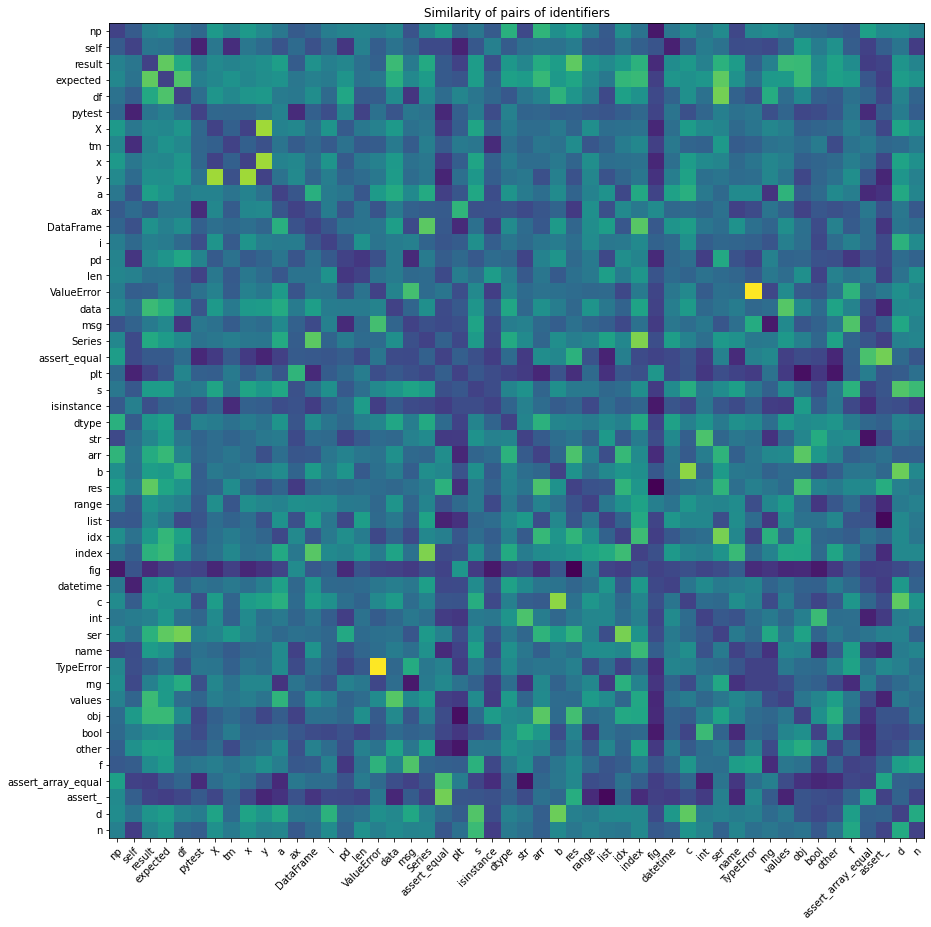

In [87]:
# Make a Heatmap of the similarity of pairs

import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(similarity_array)
label_words = []
for pair in most_common_50:
    label_words.append(pair[0])

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(most_common_50)), labels=label_words)
ax.set_yticks(np.arange(len(most_common_50)), labels=label_words)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Similarity of pairs of identifiers")
plt.show()
fig.savefig('Similarity_of_pairs_of_identifiers.png')

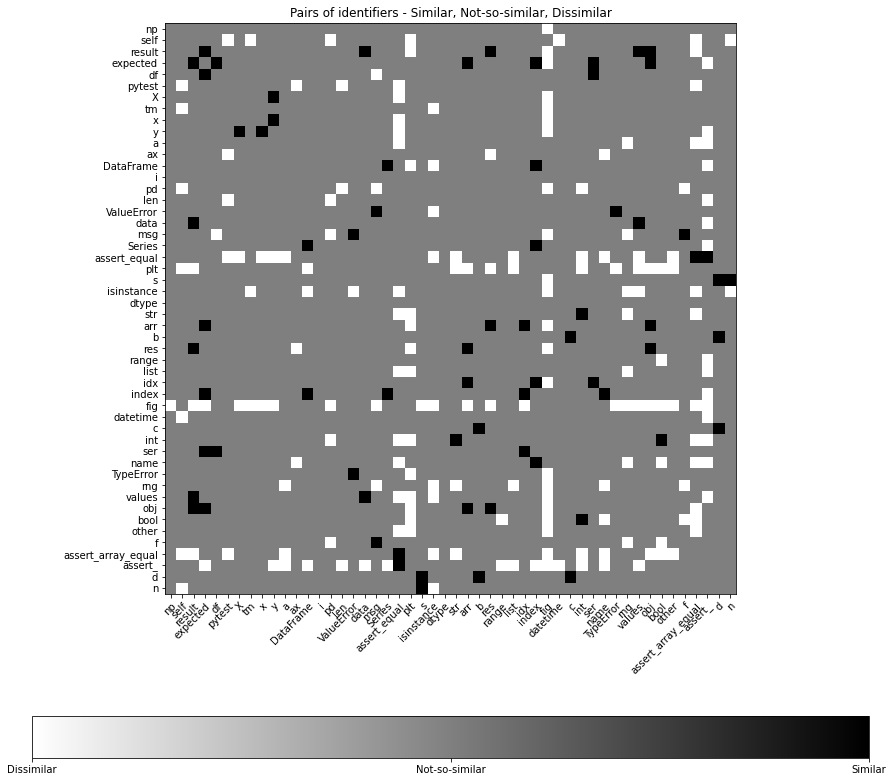

In [88]:
# Similar pairs: similarity > 0.5
# Not-so-similar pairs: 0 < similarity < 0.5
# Dissimilar pairs: similarity < 0

adjusted_similarity_array = np.empty((50,50))
for i in range(50):
    for j in range(50):
        if similarity_array[i][j] > 0.5:
            adjusted_similarity_array[i][j] = 1
        elif similarity_array[i][j] < 0:
            adjusted_similarity_array[i][j] = -1
        else:
            adjusted_similarity_array[i][j] = 0
            
            
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(adjusted_similarity_array, cmap='binary')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(most_common_50)), labels=label_words)
ax.set_yticks(np.arange(len(most_common_50)), labels=label_words)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

cbar = plt.colorbar(im,location = "bottom", ticks=[-1, 0, 1])
cbar.ax.set_xticklabels(['Dissimilar', 'Not-so-similar', 'Similar'])

ax.set_title("Pairs of identifiers - Similar, Not-so-similar, Dissimilar")
plt.show()
fig.savefig('Similarity_Categorization.png')

## Extension ##
Apply your Python2Vec model in other software engineering applications, such as autocomplete.

*For this extension, I wrote a function called "what_is_this_code" to summarize the content of a string of texts in one word. I achieve it by taking the mean of the vector of all words and find the most similar word.*

In [89]:
def what_is_this_code(text):
    clean_text = re.sub(r'[^\w\s]', ' ', text)

    list_of_words = clean_text.split()
    
    vecs = []
    
    for word in list_of_words:
        vecs.append(model.wv[word.lower()])
        
    mean_of_vecs = sum(vecs)/len(vecs)

    most_similar = model.wv.most_similar(mean_of_vecs)
    
    return most_similar

In [90]:
test_text_1 = "import matplotlib.pyplot as plt"
print("test_text_1:", test_text_1, "\n\n")

result_1 = what_is_this_code(test_text_1)

print("This line of code is likely:")
for i in range(5):
    print(i+1, ".", result_1[i][0])

test_text_1: import matplotlib.pyplot as plt 


This line of code is likely:
1 . matplotlib
2 . axisartist
3 . pyplot
4 . mpl_toolkits
5 . seaborn


In [91]:
test_text_2 = '''from io import BytesIO
import os
import tarfile
import zipfile

import numpy as np
import pytest'''

print("test_text_2:", test_text_2, "\n\n")

result_2 = what_is_this_code(test_text_2)

print("This line of code is likely:")
for i in range(5):
    print(i+1, ".", result_2[i][0])

test_text_2: from io import BytesIO
import os
import tarfile
import zipfile

import numpy as np
import pytest 


This line of code is likely:
1 . import
2 . contextmanager
3 . __all__
4 . distutils
5 . contextlib
